# Lab1 - Back Propagation

建造一個具有兩層hidden layers的model，並計算forward和backward propagation，來預測Linear和XOR dataset。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) # don't use scientific notation

### Dataset generation

x: shape = (number of data, input dimension)<br>
y: shape = (number of data, label)

- linear:
  - label = 0, x1 > x2 which falls on the bottom-right side.
  - label = 1, x1 < x2 which falls on the uppear-left side.

- XOR:
  - label = 0, x2 = x1
  - label = 1, x2 = 1 - x1

In [ ]:
def generate_linear(n=100):
  np.random.seed(0)
  pts = np.random.uniform(0, 1, (n, 2))
  inputs = []
  labels = []
  for pt in pts:
    inputs.append([pt[0], pt[1]])
    distance = (pt[0]-pt[1])/1.414
    if pt[0] > pt[1]:
      labels.append(0)
    else:
      labels.append(1)

  return np.array(inputs), np.array(labels).reshape(n, 1)

In [ ]:
def generate_XOR_easy(n=10):
  inputs = []
  labels = []
  for i in range(n+1):
    inputs.append([0.1*i, 0.1*i])
    labels.append(0)
  
    if 0.1*i == 0.5:
      continue
    
    inputs.append([0.1*i, 1-0.1*i])
    labels.append(1)

  return np.array(inputs), np.array(labels).reshape(21, 1)

## Activation Function

### Sigmoid
$$ \sigma = \frac{1}{1+e^{-x}} $$

$$ \frac{\partial\sigma}{\partial x} = \sigma(x)(1-\sigma(x))   $$

In [ ]:
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

def derivative_sigmoid(x):
  return np.multiply(sigmoid(x), 1-sigmoid(x))

In [ ]:
def init_parameter(nx, nh1, nh2, ny):
  w1 = np.random.randn(nx, nh1)
  # b1 = np.zeros([100, 1]) 
  w2 = np.random.randn(nh1, nh2)
  # b2 = np.zeros([100, 1]) 
  w3 = np.random.randn(nh2, ny)
  # b3 = np.zeros([100, 1])

  return w1, w2, w3

# init_parameter(2, 10, 10, 1)

In [ ]:
def forward(x, parameters):
  w1, w2, w3 = parameters

  z1 = np.dot(x, w1)
  a1 = sigmoid(z1)
  z2 = np.dot(a1, w2)
  a2 = sigmoid(z2)
  z3 = np.dot(a2, w3)
  a3 = sigmoid(z3)

  return z1, a1, z2, a2, z3, a3

In [ ]:
def loss_func(y, y_pred):
  m = y.shape[0]
  cost_sum = np.multiply(np.log(y_pred), y) + np.multiply((1 - y), np.log(1 - y_pred))
  cost = - np.sum(cost_sum) / m
  cost = np.squeeze(cost)
  return cost

In [ ]:
def backward(parameters, neural, x, y):
  m = y.shape[0]
  w1, w2, w3 = parameters
  z1, a1, z2, a2, z3, a3 = neural

  # output to hidden layer 2
  da3 = - np.divide(y, a3) + np.divide(1-y, 1-a3)
  dz3 = da3 * derivative_sigmoid(z3)
  dw3 = 1/m * np.dot(a2.T, dz3)

  # hidden layer 2 to hidden layer 1
  da2 = np.dot(dz3, w3.T)
  dz2 = da2 * derivative_sigmoid(z2)
  dw2 = 1/m * np.dot(a1.T, dz2)
  
  # hidden layer 1 to input
  da1 = np.dot(dz2, w2.T)
  dz1 = da1 * derivative_sigmoid(z1)
  dw1 = 1/m * np.dot(x.T, dz1)

  return dw1, dw2, dw3
  # return dw1, dz1, da1, dw2, dz2, da2, dw3, dz3, da3 

In [ ]:
def update_parameters(parameters, gradients, lr=0.01):
  dw1, dw2, dw3 = gradients
  w1, w2, w3 = parameters

  w1 = w1 - lr*dw1
  w2 = w2 - lr*dw2
  w3 = w3 - lr*dw3

  return w1, w2, w3

In [ ]:
def model(x, y, nh1, nh2, iter=10000, lr=0.01):
  costs = []
    
  nx = x.shape[1]
  ny = y.shape[1]
  
  # init parameters
  parameters = init_parameter(nx, nh1, nh2, ny)
  for i in range(iter):
    neural = forward(x, parameters)
    cost = loss_func(y, neural[5])
    gradients = backward(parameters, neural, x, y)
    parameters = update_parameters(parameters, gradients, lr)
    
    if i % 5000 == 0:
      costs.append(cost)
      print("epoch {} loss : {}".format(i, cost))

  return parameters, costs

In [ ]:
def show_result(x, y, pred_y, iter, step, costs):
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 3, 1)
  plt.title('Ground truth', fontsize=18)
  plt.xlabel("x1", fontsize=12)
  plt.ylabel("x2", fontsize=12)
  for i in range(x.shape[0]):
    if y[i] == 0:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')

  plt.subplot(1, 3, 2)
  plt.title('Predict result', fontsize=18)
  plt.xlabel("x1", fontsize=12)
  plt.ylabel("x2", fontsize=12)
  for i in range(x.shape[0]):
    if pred_y[i,:] < 0.5:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')

  plt.subplot(1, 3, 3)
  plt.title('Learning Curve', fontsize=18)  
  plt.xlabel("Epoch", fontsize=12)
  plt.ylabel("Loss", fontsize=12)
  plt.plot(np.arange(0, iter, step), costs)

  plt.tight_layout()
  plt.show()

epoch 0 loss : 0.7551380924502847
epoch 5000 loss : 0.32127491075197234
epoch 10000 loss : 0.16142473010857336
epoch 15000 loss : 0.10622707189940829
epoch 20000 loss : 0.08006365218829962
epoch 25000 loss : 0.06490587343922537
epoch 30000 loss : 0.054991687077352
epoch 35000 loss : 0.047972084231739064
epoch 40000 loss : 0.04271929111240981
epoch 45000 loss : 0.03862570447943232
epoch 50000 loss : 0.03533498900856528
epoch 55000 loss : 0.03262421712039268
epoch 60000 loss : 0.030346670883125957
epoch 65000 loss : 0.02840176969265186
epoch 70000 loss : 0.026718209450847876
epoch 75000 loss : 0.02524399891114599
epoch 80000 loss : 0.02394030918704075
epoch 85000 loss : 0.02277753498302644
epoch 90000 loss : 0.021732691834338
epoch 95000 loss : 0.02078764891143171
epoch 100000 loss : 0.019927900350433816
epoch 105000 loss : 0.0191416929073859
epoch 110000 loss : 0.018419394911752204
epoch 115000 loss : 0.017753032036715865
epoch 120000 loss : 0.017135940554287417
epoch 125000 loss : 0.01

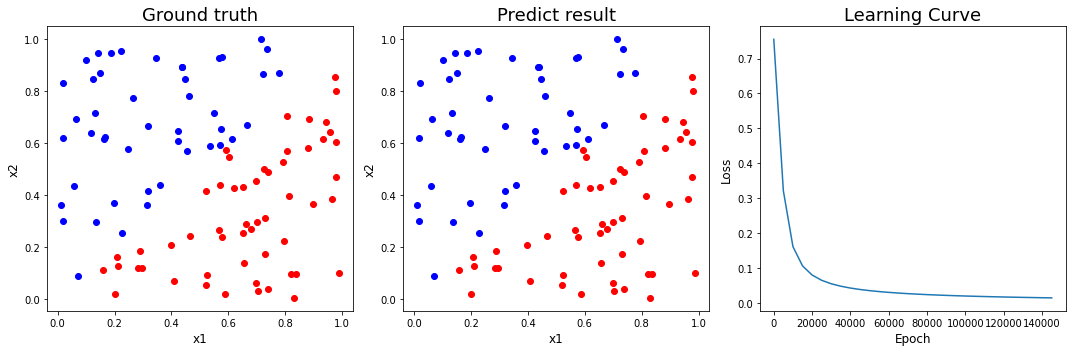

In [ ]:
iter = 150000
np.random.seed(10)
x_train_linear, y_train_linear = generate_linear(100)
parameters_linear, costs_linear = model(x_train_linear, y_train_linear, 10, 10, iter=iter, lr=0.01)
*_, y_pred_linear = forward(x_train_linear, parameters_linear)
print(y_pred_linear)
show_result(x_train_linear, y_train_linear, y_pred_linear, iter, 5000, costs_linear)

epoch 0 loss : 2.980527986737443
epoch 5000 loss : 0.6841081894406625
epoch 10000 loss : 0.6750800780006874
epoch 15000 loss : 0.659762453876336
epoch 20000 loss : 0.6301389245054484
epoch 25000 loss : 0.5669651407562102
epoch 30000 loss : 0.4386845058053084
epoch 35000 loss : 0.30166084016881545
epoch 40000 loss : 0.213994416247691
epoch 45000 loss : 0.15806937134681848
epoch 50000 loss : 0.118155187564618
epoch 55000 loss : 0.0884125093910559
epoch 60000 loss : 0.06673758122624238
epoch 65000 loss : 0.05136482850470489
epoch 70000 loss : 0.04053154807039513
epoch 75000 loss : 0.03280642753418452
epoch 80000 loss : 0.027178980319235924
epoch 85000 loss : 0.02297841932838321
epoch 90000 loss : 0.01976664505566955
epoch 95000 loss : 0.01725567348813957
epoch 100000 loss : 0.015252981709445893
epoch 105000 loss : 0.013627144810557186
epoch 110000 loss : 0.012286465945245004
epoch 115000 loss : 0.011165592677539206
epoch 120000 loss : 0.01021700683288544
epoch 125000 loss : 0.009405511736

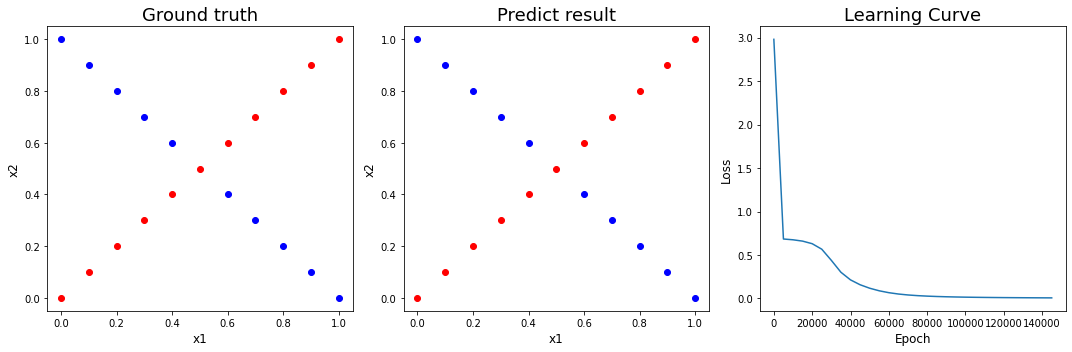

In [ ]:
iter = 150000
np.random.seed(10)
x_train_xor, y_train_xor = generate_XOR_easy(10)
parameters_xor, costs_xor = model(x_train_xor, y_train_xor, 10, 10, iter=iter, lr=0.01)
*_, y_pred_xor = forward(x_train_xor, parameters_xor)
print(y_pred_xor)
show_result(x_train_xor, y_train_xor, y_pred_xor, iter, 5000, costs_xor)